In [49]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.regularizers import l2

In [50]:
def plot_n_img(n, x):
    plt.figure(figsize=(2*n, 2))
    for i in range(1, n + 1):
        ax = plt.subplot(1, n, i)
        plt.imshow(x[i-1].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [51]:
# load data 

(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = mnist.load_data()

# normalize data 
x_train = x_train_orig.reshape(x_train_orig.shape[0], -1).astype('float32')/255.
y_train = y_train_orig.reshape(y_train_orig.shape[0], -1).astype('float32')/255.

x_test = x_test_orig.reshape(x_test_orig.shape[0], -1).astype('float32')/255.
y_test = y_test_orig.reshape(y_test_orig.shape[0], -1).astype('float32')/255.

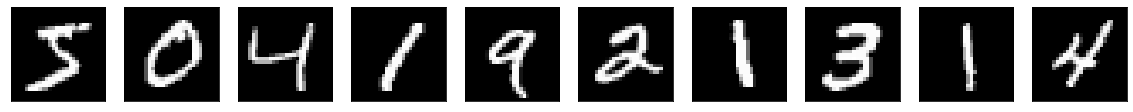

In [52]:
# visulizing 

plot_n_img(10, x_train)

In [53]:
def NN_train(m_size = 40, 
             epochs = 10, 
             activation = tf.keras.activations.relu, 
             optimizer = tf.keras.optimizers.Adam(), 
             loss = tf.keras.losses.mean_squared_error):
    
    # Neural network 

    input_size = 784
    m_size = m_size
    hidden_size = 128

    # encoding 
    input_img = tf.keras.Input(shape=(input_size,))
    #h1_layer = Dense(hidden_size, activation='relu')(input_img)
    #h2_layer = Dense(hidden_size, activation='relu')(h1_layer)

    # middle layer 
    m_layer = Dense(m_size, activation=activation)(input_img)
    #m_layer = Dense(m_size, activation='relu')(h2_layer)

    # decoding 
    #h11_layer = Dense(hidden_size, activation='relu')(m_layer)
    #h22_layer = Dense(hidden_size, activation='relu')(h11_layer)
    #output_img = Dense(input_size, activation='sigmoid')(h22_layer)
    output_img = Dense(input_size, activation='sigmoid')(m_layer)

    im_rec = Model(input_img, output_img)
    im_rec.compile(optimizer = optimizer, loss = loss)
    history = im_rec.fit(x_train, x_train, batch_size = 32, epochs = epochs, 
                        validation_split = 0.2)
    
    # predict 
    x_pred = im_rec.predict(x_test[:10])

    # compare 
    print('the original images')
    plot_n_img(10, x_test[:10])
    print('and the sparse images')
    plot_n_img(10, x_pred)
    
    # plot the loss
    plt.figure('20 Epochs 1', figsize = (10,7))
    my_loss = history.history['loss']
    my_vali_loss = history.history['val_loss']
    mvs = np.arange(0,np.size(my_loss),dtype='float32')
    plt.semilogy(mvs,my_loss)
    plt.semilogy(mvs,my_vali_loss)
    plt.legend(['loss', 'val_loss'],  loc='upper right', fontsize=12)
    plt.show()

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0327 - val_loss: 0.0162
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0124 - val_loss: 0.0099
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0091 - val_loss: 0.0086
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0083 - val_loss: 0.0082
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0079 - val_loss: 0.0080
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0078 - val_loss: 0.0079
Epoch 9/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0077 - val_loss: 0.0078
Epoch 10/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.007

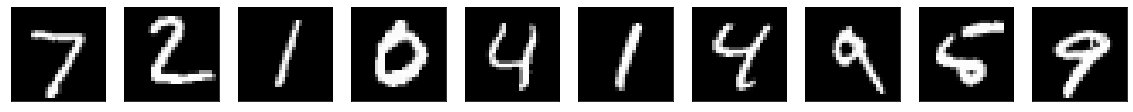

and the sparse images


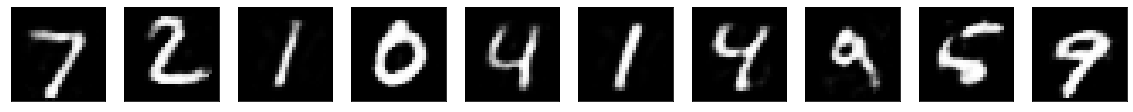

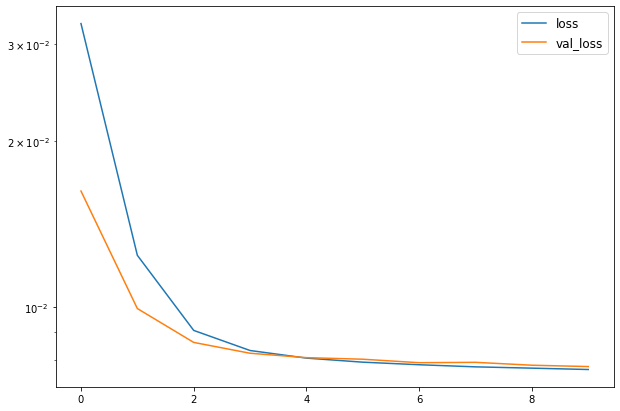

In [54]:
NN_train(m_size = 40, 
        epochs = 10, 
        activation = tf.keras.activations.relu, 
        optimizer = tf.keras.optimizers.Adam(), 
        loss = tf.keras.losses.mean_squared_error)